In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_timeline(t_max, dt):
    return np.arange(0, t_max, dt)

In [3]:
def euler(f_func, v_c, is_volt_time_dep, volt_thresh_time, n_0, t_max, dt):
    t = get_timeline(t_max, dt)
    n = np.zeros(len(t))
    n[0] = n_0
        
    for i in range(len(t)-1):
        if(is_volt_time_dep and (t[i] < volt_thresh_time)) :
            v = -65
        else:
            v = v_c
        n[i+1] = n[i] + f_func(v, n[i], t[i])*dt
    return n, t

# 1. Potassium Channel

### 1 (a) defining functions

In [4]:
def alpha_n(v) :
    return 0.01*(v + 55)/(1 - np.exp(-0.1 * (v + 55)))

In [5]:
def beta_n(v) :
    return 0.125 * np.exp(-0.0125 * (v + 65))

In [6]:
def open_close_ion_channel_probability(v, n, t) :
    return alpha_n(v)*(1-n) - beta_n(v)*n

In [7]:
def potassium_current(v, n) :
    g_k = 36 #nS
    e_k = -77 #mV
    return g_k * np.power(n,4) * (v - e_k)

### 1 (b) Activation Time Constant and Steady-State Activation

In [8]:
def tau_n(v) :
    return 1/(alpha_n(v) + beta_n(v))

In [9]:
def steady_state_activation_n(v) :
    return alpha_n(v)/(alpha_n(v) + beta_n(v))

In [10]:
def plot_function(axes, x_range, y_range, title, x_label, y_label):
    axes.plot(x_range, y_range)
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)

In [11]:
voltage_range = np.arange(-150, 150, 0.01)

In [12]:
tau = tau_n(voltage_range)
n_infinity = steady_state_activation_n(voltage_range)

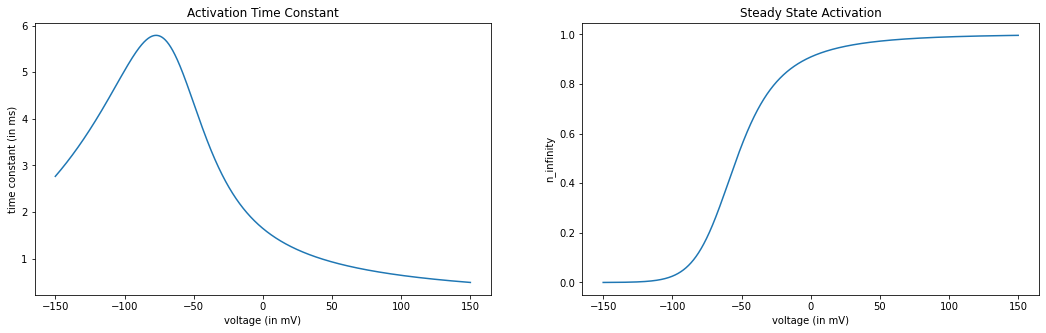

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
plot_function(axes[0], voltage_range, tau, 'Activation Time Constant', 'voltage (in mV)', 'time constant (in ms)')
plot_function(axes[1], voltage_range, n_infinity, 'Steady State Activation', 'voltage (in mV)', 'n_infinity')

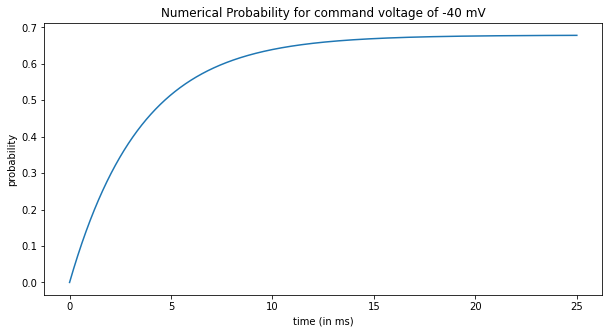

In [14]:
n_t_0 = 0
t_max = 25 # ms
dt = 0.001
v = -40 #mv
numerical_n, t = euler(open_close_ion_channel_probability, v, False, 0,  n_t_0, t_max, dt)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plot_function(axes, t, numerical_n, 'Numerical Probability for command voltage of -40 mV', 'time (in ms)', 'probability')

In [15]:
numerical_n_infinity_at_23_ms = numerical_n[int(23/dt)]
print(f'{numerical_n_infinity_at_23_ms = }')

numerical_n_infinity_at_23_ms = 0.6776158650871139


The numerically calculated probability is matching with the given value in the question (approximately)

### 1 (c) Voltage clamp.

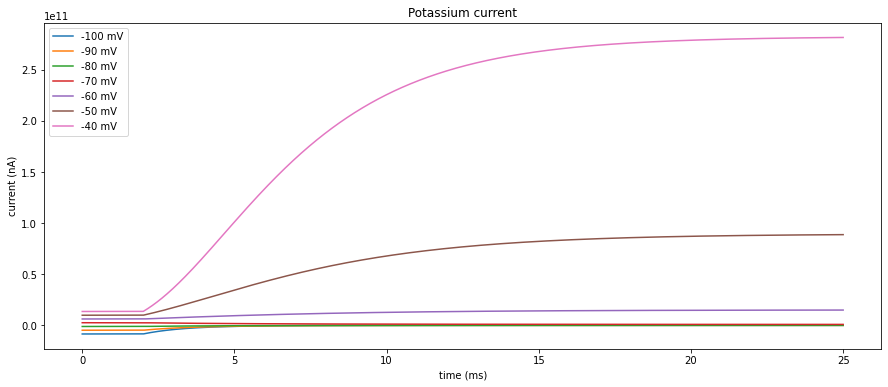

In [16]:
n_t_0 = 0.3177
t_max = 25 # ms
dt = 0.001
voltage_range_1c = np.arange(-100, -39, 10)#mv

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

for v_1c in voltage_range_1c :
    numerical_n, t = euler(open_close_ion_channel_probability, v_1c , True, 2,  n_t_0, t_max, dt)
    
    i = potassium_current(v_1c, numerical_n)
    axes.plot(t,i*1e9, label = str(v_1c) + ' mV') 
    axes.set_title('Potassium current')
    axes.set_ylabel('current (nA)')
    axes.set_xlabel('time (ms)')
    axes.legend()


The current is zero at -70 mV and starts increases non-linearly post 2 ms if V_c increase above -70mV, however has a constant small current before 2 ms. The current flow becomes constant after almost 23 ms(can be considered as the time constant). Thus we can say that there is net flow of ions within a small time range(2ms - 23ms) with V_c above -70 mV resulting in a membrane potential.

### 1 (d) Current-voltage relation.

In [17]:
voltage_range = np.arange(-150, 150, 0.01)

In [18]:
n_t_0 = 0.3177
instantaneous_current = potassium_current(voltage_range, n_t_0)

In [19]:
n_infinity = steady_state_activation_n(voltage_range)
steady_state_current = potassium_current(voltage_range, n_infinity)

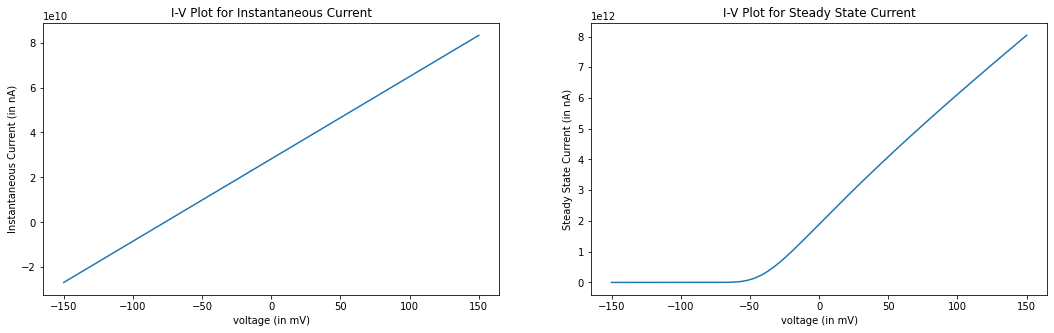

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
plot_function(axes[0], voltage_range, instantaneous_current*1e9, 'I-V Plot for Instantaneous Current', 'voltage (in mV)', 'Instantaneous Current (in nA)')
plot_function(axes[1], voltage_range, steady_state_current*1e9, 'I-V Plot for Steady State Current', 'voltage (in mV)', 'Steady State Current (in nA)')

# 2. Sodium ion channel

### 2 (a) Write all necessary functions and plot the steady-state activation and time constant of m and h as a function of the membrane potential.

In [21]:
def sodium_current(v, m, h) :
    g_na = 120 #nS
    e_na = 50 #mV
    return g_na * np.power(m,3) * h * (v - e_na)

In [22]:
def alpha_m(v) :
    return 0.1*(v + 40)/(1 - np.exp(-0.1 * (v + 40)))

In [23]:
def beta_m(v) :
    return 4 * np.exp(-0.0556 * (v + 65))

In [24]:
def alpha_h(v) :
    return 0.07 * np.exp(-0.05 * (v + 65))

In [25]:
def beta_h(v) :
    return 1/(1 + np.exp(-0.1 * (v + 35)))

In [26]:
def open_close_ion_channel_probability_m(v, m, t) :
    return alpha_m(v)*(1-m) - beta_m(v)*m

In [27]:
def open_close_ion_channel_probability_h(v, h, t) :
    return alpha_h(v)*(1-h) - beta_h(v)*h

In [28]:
def tau_m(v) :
    return 1/(alpha_m(v) + beta_m(v))

def tau_h(v) :
    return 1/(alpha_h(v) + beta_h(v))

In [29]:
def steady_state_activation_m(v) :
    return alpha_m(v)/(alpha_m(v) + beta_m(v))

def steady_state_activation_h(v) :
    return alpha_h(v)/(alpha_h(v) + beta_h(v))

In [30]:
def plot_function_with_label(axes, x_range, y_range, title, x_label, y_label, label_m):
    axes.plot(x_range, y_range, label = label_m)
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.legend()

In [31]:
tau_m = tau_m(voltage_range)
m_infinity = steady_state_activation_m(voltage_range)

tau_h = tau_h(voltage_range)
h_infinity = steady_state_activation_h(voltage_range)

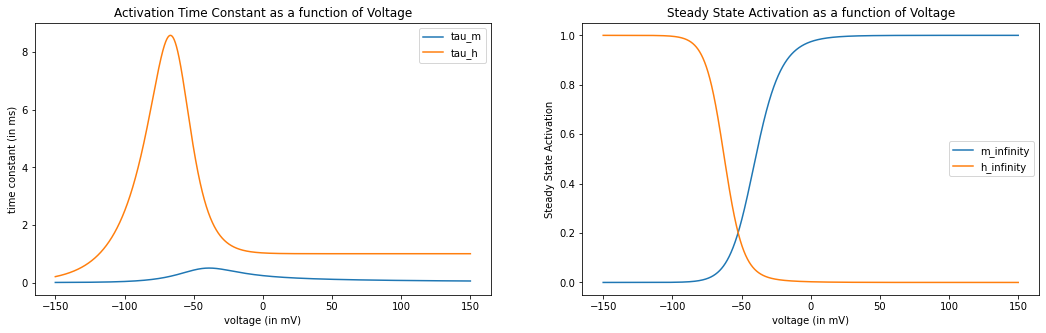

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
plot_function_with_label(axes[0], voltage_range, tau_m, 'Activation Time Constant as a function of Voltage', 'voltage (in mV)', 'time constant (in ms)', 'tau_m')
plot_function_with_label(axes[0], voltage_range, tau_h, 'Activation Time Constant as a function of Voltage', 'voltage (in mV)', 'time constant (in ms)', 'tau_h')

plot_function_with_label(axes[1], voltage_range, m_infinity, 'Steady State Activation as a function of Voltage', 'voltage (in mV)', 'Steady State Activation', 'm_infinity')
plot_function_with_label(axes[1], voltage_range, h_infinity, 'Steady State Activation as a function of Voltage', 'voltage (in mV)', 'Steady State Activation', 'h_infinity')

Activation time constant tau_m becomes much flatter when compared to tau_n, where as tau_h(a little high) is much comparable with tau_n

m_infinity is increasing with increase in voltage similar to n_infinity whereas h_infinity is decreasing with the increase in voltage

### 2 (b) Simulate and plot the sodium current

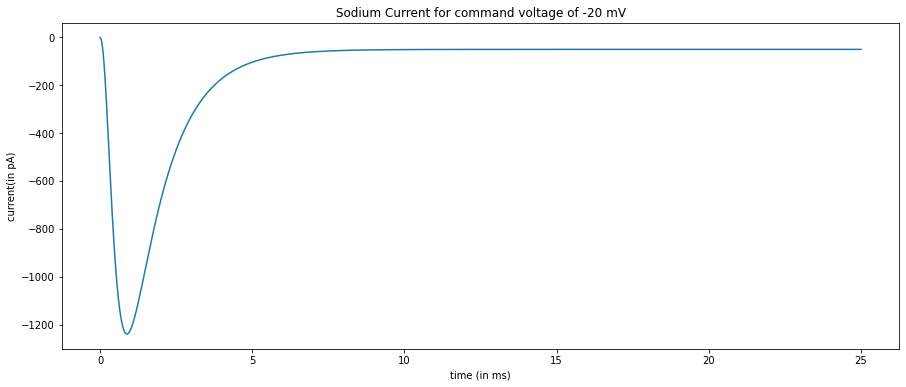

In [52]:
m_t_0 = 0.0529
h_t_0 = 0.5961
t_max = 25 # ms
dt = 0.001
v_c_2b = -20 #mv
numerical_m, t = euler(open_close_ion_channel_probability_m, v_c_2b, False, 0,  m_t_0, t_max, dt)
numerical_h, t = euler(open_close_ion_channel_probability_h, v_c_2b, False, 0,  h_t_0, t_max, dt)

i_sodium = sodium_current(v_c_2b, numerical_m, numerical_h)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
plot_function(axes, t, i_sodium, 'Sodium Current for command voltage of -20 mV', 'time (in ms)', 'current(in pA)')

In [41]:
min_current = min(i_sodium)
print(f'{min_current=}')

-1239.2303835547104


This is matching with the minimum current given in the exercise (approximately)

In [44]:
steady_state_current_at_15 = i_sodium[int(15/dt)]
print(steady_state_current_at_15)

-50.499348537265206


The steady current at 15 ms is also matching with the steady state current given in the exercise (approximately) 

### 2 (c) Simulate the voltage clamp experiment for the sodium current

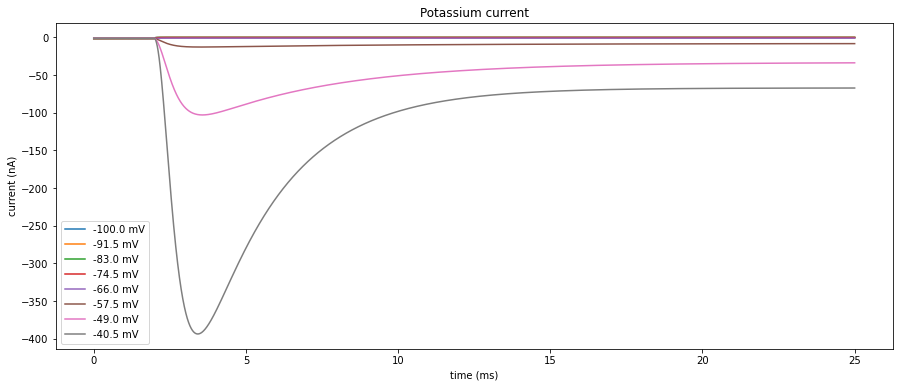

In [68]:
m_t_0 = 0.0529
h_t_0 = 0.5961
t_max = 25 # ms
dt = 0.001
voltage_range_2c = np.arange(-100, -39, 8.5)#mv

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

for v_c_2c in voltage_range_2c :
    numerical_m, t = euler(open_close_ion_channel_probability_m, v_c_2c , True, 2,  m_t_0, t_max, dt)
    numerical_h, t = euler(open_close_ion_channel_probability_h, v_c_2c , True, 2,  h_t_0, t_max, dt)
    
    i_sodium_2c = sodium_current(v_c_2c, numerical_m, numerical_h)
    axes.plot(t, i_sodium_2c, label = str(v_c_2c) + ' mV') 
    
axes.set_title('Potassium current')
axes.set_ylabel('current (nA)')
axes.set_xlabel('time (ms)')
axes.legend();

above almost 60 mV the ion channels open and increases the current rapidly(with the increase in voltage) and once equilibrium is reached, the current flow ceases

### 2 (d) Plot the instantaneous and steady-state I-V curves for sodium channels

In [69]:
voltage_range_2d = np.arange(-150, 150, 0.01)

In [70]:
m_t_0 = 0.0529
h_t_0 = 0.5961
instantaneous_sod_current = sodium_current(voltage_range_2d, m_t_0, h_t_0)

In [71]:
m_infinity = steady_state_activation_m(voltage_range_2d)
h_infinity = steady_state_activation_h(voltage_range_2d)
steady_state_sod_current = sodium_current(voltage_range_2d, m_infinity, h_infinity)

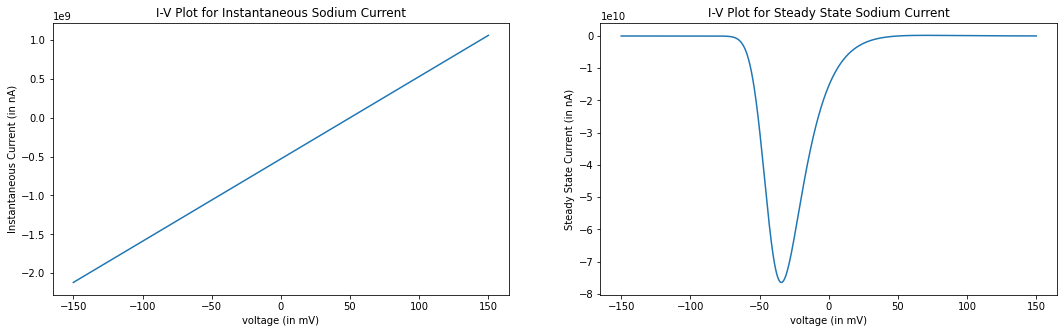

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
plot_function(axes[0], voltage_range_2d, instantaneous_sod_current*1e9, 'I-V Plot for Instantaneous Sodium Current', 'voltage (in mV)', 'Instantaneous Current (in nA)')
plot_function(axes[1], voltage_range_2d, steady_state_sod_current*1e9, 'I-V Plot for Steady State Sodium Current', 'voltage (in mV)', 'Steady State Current (in nA)')


if we compare with 1(d) the Instantaneos Current plot looks similar, whereas the Steady State Current drops suddenly and stabilizes with he rise in voltage unline the potassium steady state current